In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
car_data = pd.read_csv('2. Cars Data1.csv')

In [3]:
car_data.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [5]:
car_data.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [6]:
car_data[car_data.Cylinders.isnull()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197.0,18.0,25.0,3053.0,106.0,174.0
252,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238.0,18.0,24.0,3029.0,106.0,174.0


In [7]:
car_data.dropna(axis = 0, inplace = True)

In [8]:
car_data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [9]:
car_data['MSRP'] = car_data.MSRP.str.replace("$","").str.replace(",","")
car_data['Invoice'] = car_data.Invoice.str.replace("$","").str.replace(",","")
car_data

C:\Users\taksh\AppData\Local\Temp\ipykernel_3948\811670960.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_data['MSRP'] = car_data.MSRP.str.replace("$","").str.replace(",","")
C:\Users\taksh\AppData\Local\Temp\ipykernel_3948\811670960.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_data['Invoice'] = car_data.Invoice.str.replace("$","").str.replace(",","")


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [10]:
car_data['MSRP'] = pd.to_numeric(car_data.MSRP)
car_data['Invoice'] = pd.to_numeric(car_data.Invoice)
car_data

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    float64
 10  MPG_City     426 non-null    float64
 11  MPG_Highway  426 non-null    float64
 12  Weight       426 non-null    float64
 13  Wheelbase    426 non-null    float64
 14  Length       426 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 53.2+ KB


In [12]:
car_according_Driven_Train = car_data.groupby(['Origin','Make','Type','DriveTrain'])[['MSRP']].mean().reset_index()
car_according_Driven_Train

,Origin,Make,Type,DriveTrain,MSRP
0,Asia,Acura,SUV,All,36945.000000
1,Asia,Acura,Sedan,Front,34772.000000
2,Asia,Acura,Sports,Rear,89765.000000
3,Asia,Honda,Hybrid,Front,19625.000000
4,Asia,Honda,SUV,All,22036.666667
...,...,...,...,...,...
145,USA,Pontiac,Sports,Rear,33500.000000
146,USA,Pontiac,Wagon,Rear,17045.000000
147,USA,Saturn,SUV,All,20585.000000
148,USA,Saturn,Sedan,Front,15621.666667


In [13]:
car_data.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,32804.549296,30040.654930,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,19472.460825,17679.430122,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,18836.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,27807.500000,25521.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39225.000000,35754.750000,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [14]:
country_type = car_data.groupby(['Origin','Type'])[['Type']].value_counts()
country_type = country_type.reset_index().rename(columns = {0:'Total'})
car_according_origin = country_type.sort_values(by = ['Origin','Total'], ascending = False)
car_according_origin

,Origin,Type,Total
11,USA,Sedan,90
10,USA,SUV,25
13,USA,Truck,16
12,USA,Sports,9
14,USA,Wagon,7
7,Europe,Sedan,78
8,Europe,Sports,23
9,Europe,Wagon,12
6,Europe,SUV,10
2,Asia,Sedan,94


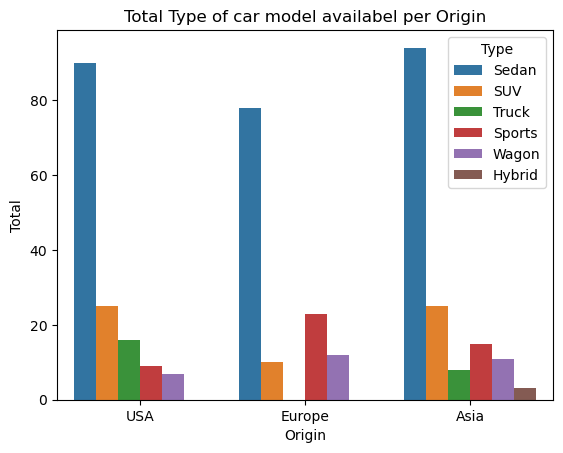

In [15]:
sns.barplot(data = car_according_origin, x = 'Origin', y = 'Total', hue = 'Type').set_title("Total Type of car model availabel per Origin");

In [16]:
country_type = car_data.groupby(['Origin','Type'])[['MSRP']].mean()
country_type = country_type.reset_index().rename(columns = {0:'Price'})
car_according_price = country_type.sort_values(by = ['Origin','MSRP'], ascending = False)
car_according_price

,Origin,Type,MSRP
12,USA,Sports,45257.222222
10,USA,SUV,34589.200000
13,USA,Truck,27220.250000
11,USA,Sedan,25638.833333
14,USA,Wagon,22345.714286
8,Europe,Sports,71998.695652
6,Europe,SUV,48346.000000
7,Europe,Sedan,42992.051282
9,Europe,Wagon,37851.250000
3,Asia,Sports,33318.733333


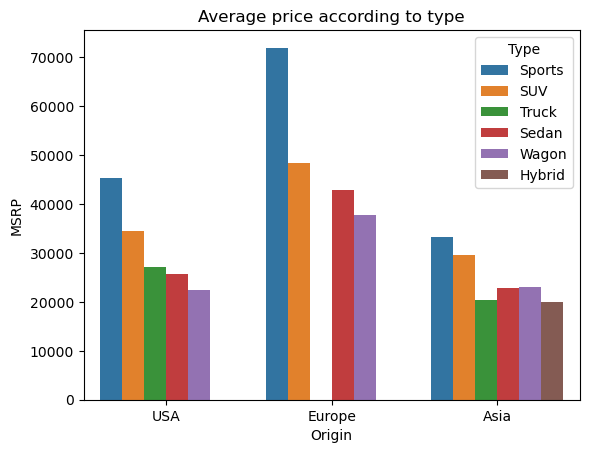

In [17]:
sns.barplot(data = car_according_price, x = 'Origin', y = 'MSRP', hue = 'Type').set_title("Average price according to type");

In [18]:
car_data['Profit'] = car_data.MSRP - car_data.Invoice
car_data.Profit.head(5)

0    3608
1    2059
2    2343
3    2896
4    4741
Name: Profit, dtype: int64

In [19]:
avg_profit_per_type = car_data.groupby(['Make','Type'])[['Profit']].mean().reset_index()
lowest_profit_company = avg_profit_per_type.sort_values(by = ['Profit']).iloc[:4]
highest_profit_company = avg_profit_per_type.sort_values(by = ['Profit'], ascending = False).iloc[:4]
profit_chart_data = highest_profit_company.append(lowest_profit_company, ignore_index = True)
profit_chart_data

C:\Users\taksh\AppData\Local\Temp\ipykernel_3948\542130365.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  profit_chart_data = highest_profit_company.append(lowest_profit_company, ignore_index = True)


,Make,Type,Profit
0,Porsche,Sports,10419.166667
1,Acura,Sports,9787.000000
2,Lexus,Sports,8137.000000
3,Dodge,Sports,7344.000000
4,Suzuki,Sedan,180.000000
5,Suzuki,Wagon,206.000000
6,Kia,Wagon,495.000000
7,Scion,Sedan,625.000000


In [20]:
brand_name_in_list = profit_chart_data.Make.unique().tolist()
brand_all_data = avg_profit_per_type[avg_profit_per_type.Make.isin(brand_name_in_list)]
brand_all_data

,Make,Type,Profit
0,Acura,SUV,3608.000000
1,Acura,Sedan,3407.800000
2,Acura,Sports,9787.000000
24,Dodge,SUV,2763.000000
25,Dodge,Sedan,1497.125000
26,Dodge,Sports,7344.000000
27,Dodge,Truck,1711.666667
50,Kia,SUV,1005.000000
51,Kia,Sedan,1037.888889
52,Kia,Wagon,495.000000


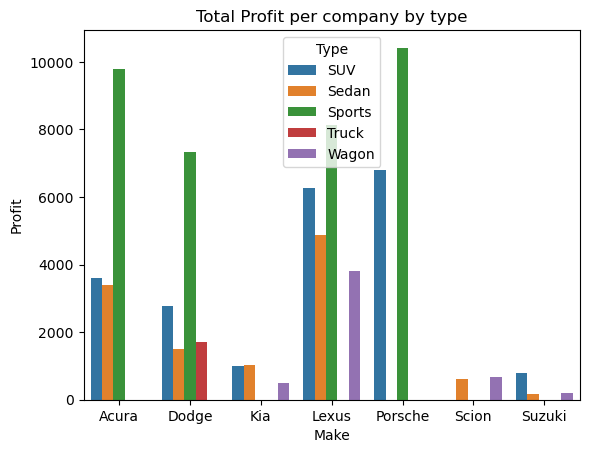

In [21]:
sns.barplot(data = brand_all_data, x = 'Make', y = 'Profit', hue = 'Type').set_title('Total Profit per company by type');

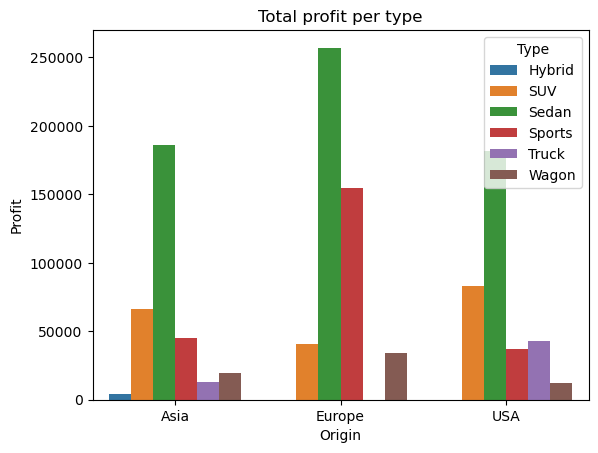

In [22]:
total_profit_accoding_to_Origin = car_data.groupby(['Origin','Type'])[['Profit']].sum().reset_index()
sns.barplot(data = total_profit_accoding_to_Origin, x = 'Origin', y = 'Profit', hue = 'Type').set_title("Total profit per type");

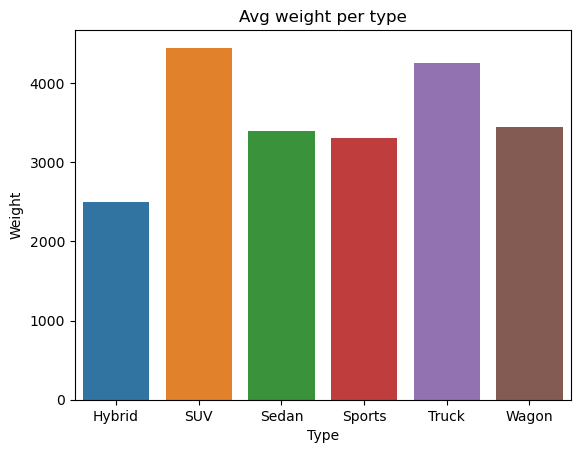

In [23]:
avg_weight_per_type = car_data.groupby(['Type'])[['Weight','Horsepower']].mean().reset_index()
sns.barplot(data = avg_weight_per_type, x = 'Type', y = 'Weight').set_title('Avg weight per type');

In [24]:
car_data

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Profit
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,3608
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,2059
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,2343
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,2896
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,4741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0,2362
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0,2482
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0,2637
430,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0,1494


In [35]:
car_data.drop(columns = 'Model', inplace = True)

In [27]:
# car_data.drop(columns = ['Profit','Invoice'], inplace = True)

In [33]:
car_data = pd.get_dummies(car_data, columns = ['Make','Type','Origin','DriveTrain'], drop_first = True)

In [36]:
car_data

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Make_Volvo,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Europe,Origin_USA,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,...,0,1,0,0,0,0,0,0,0,0
1,23820,21761,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,...,0,0,1,0,0,0,0,0,1,0
2,26990,24647,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,...,0,0,1,0,0,0,0,0,1,0
3,33195,30299,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,...,0,0,1,0,0,0,0,0,1,0
4,43755,39014,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,40565,38203,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0,...,1,0,1,0,0,0,1,0,1,0
428,42565,40083,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0,...,1,0,1,0,0,0,1,0,1,0
429,45210,42573,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0,...,1,0,1,0,0,0,1,0,1,0
430,26135,24641,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0,...,1,0,0,0,0,1,1,0,1,0


In [71]:
decision = Ridge()
x_value = car_data.drop(columns = ['MSRP','Invoice'])
y_value = car_data['MSRP']
X_train, X_test, y_train, y_test = train_test_split(x_value, y_value, train_size = 0.7, random_state = True)

In [79]:
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)
print(f'train score = {train_score} \ntest score = {test_score}')

train score = 0.9655424545667812 
test score = 0.9306629873362445
